<a href="https://colab.research.google.com/github/pratik-poudel/datacrunch/blob/main/11th%20April%20Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import gc
# pd.options.display.float_format| = "{:.2f}".format
pd.options.display.max_columns = 500


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import requests
from scipy import stats

import lightgbm as lgb

In [2]:
train_datalink_X = 'https://tournament.datacrunch.com/data/X_train.csv'  
train_datalink_y = 'https://tournament.datacrunch.com/data/y_train.csv'
hackathon_data_link = 'https://tournament.datacrunch.com/data/X_test.csv'

train = pd.read_csv(train_datalink_X)
target = pd.read_csv(train_datalink_y)
test = pd.read_csv(hackathon_data_link)

In [3]:
print(train.shape, test.shape)

(91075, 31) (48537, 31)


In [4]:
train.head()

,id,moons,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29
0,0x5314efb4ebe6edb3,0,0.00,0.00,0.00,0.25,0.25,0.25,0.00,0.25,0.50,0.50,0.50,0.25,0.50,1.00,0.00,0.00,0.25,0.25,0.25,1.00,0.00,0.25,0.25,1.00,0.75,0.25,0.50,0.50,0.50
1,0xdce321dc608a6e75,0,0.50,0.00,0.25,0.00,0.25,0.25,0.75,0.50,0.00,0.00,0.00,0.00,0.00,0.75,0.00,0.25,0.25,0.25,0.25,0.50,0.25,0.00,0.50,0.00,1.00,0.00,0.25,1.00,1.00
2,0x5638d323a6eb0d6,0,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.25,0.00,0.00,0.00,0.00,0.00,0.75,0.25,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.75,0.00,1.00,1.00,0.50,0.50
3,0x76913fe81685babe,0,0.25,0.25,0.25,0.25,0.25,0.25,0.50,0.75,0.25,0.25,0.25,0.25,0.25,0.75,0.50,0.50,0.25,0.25,0.50,0.50,0.50,0.25,0.25,0.50,0.75,0.00,0.00,1.00,0.75
4,0xadb2bb2a7f67542f,0,0.50,1.00,1.00,1.00,1.00,1.00,0.50,0.25,1.00,1.00,1.00,1.00,1.00,0.75,0.75,0.75,0.75,0.75,1.00,0.75,1.00,1.00,1.00,1.00,0.50,1.00,1.00,0.75,0.50


In [13]:
def scorer(y_test, y_pred):
    score = (stats.spearmanr(y_test, y_pred))[0]
    print('Score as calculated for the leader board (っಠ‿ಠ)っ {}'.format(score))
    return score

In [14]:
import sklearn
from sklearn.utils.testing import all_estimators
from sklearn.base import RegressorMixin

In [15]:
sklearn.__version__

'0.22.2.post1'

In [16]:
from sklearn import *
from sklearn.experimental import enable_hist_gradient_boosting

In [17]:
regressors = [
                ('AdaBoostRegressor', sklearn.ensemble.AdaBoostRegressor()),
                ('BaggingRegressor', sklearn.ensemble.BaggingRegressor()),
                ('BayesianRidge', sklearn.linear_model.BayesianRidge()),
                ('DecisionTreeRegressor', sklearn.tree.DecisionTreeRegressor()),
                ('ElasticNet', sklearn.linear_model.ElasticNet()),
                ('ExtraTreeRegressor', sklearn.tree.ExtraTreeRegressor()),
                ('ExtraTreesRegressor', sklearn.ensemble.ExtraTreesRegressor()),
                ('GradientBoostingRegressor', sklearn.ensemble.GradientBoostingRegressor()),
                ('HistGradientBoostingRegressor',sklearn.ensemble.HistGradientBoostingRegressor()),
                ('HuberRegressor', sklearn.linear_model.HuberRegressor()),
                ('Lars', sklearn.linear_model.Lars()),
                ('Lasso', sklearn.linear_model.Lasso()),
                ('LassoLars', sklearn.linear_model.LassoLars()),
                ('LassoLarsIC', sklearn.linear_model.LassoLarsIC()),
                ('LinearRegression', sklearn.linear_model.LinearRegression()),
                ('OrthogonalMatchingPursuit',sklearn.linear_model.OrthogonalMatchingPursuit()),
                ('PassiveAggressiveRegressor',sklearn.linear_model.PassiveAggressiveRegressor()),
                ('RANSACRegressor', sklearn.linear_model.RANSACRegressor()),
                ('RandomForestRegressor', sklearn.ensemble.RandomForestRegressor()),
                ('Ridge', sklearn.linear_model.Ridge()),
                ('SGDRegressor', sklearn.linear_model.SGDRegressor()),
                ('TransformedTargetRegressor',sklearn.compose.TransformedTargetRegressor())
                
                ]

In [22]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import RepeatedKFold, cross_val_score
my_scorer = make_scorer(scorer, greater_is_better=True)

feat= [f for f in train.columns if "feature" in f]

cv = RepeatedKFold(n_splits=3, n_repeats=2, random_state=60)

In [ ]:
# train[feat].corrwith(target.target_r).abs().sort_values()

# TARGET R

>AdaBoostRegressor 0.347 (0.003)
>BaggingRegressor 0.319 (0.004)
>BayesianRidge 0.368 (0.004)
>DecisionTreeRegressor 0.165 (0.004)
>ElasticNet nan (nan)
>ExtraTreeRegressor 0.162 (0.007)
>ExtraTreesRegressor 0.376 (0.004)
>GradientBoostingRegressor 0.388 (0.004)
>HistGradientBoostingRegressor 0.401 (0.005)
>HuberRegressor 0.368 (0.004)
>Lars 0.342 (0.042)
>Lasso nan (nan)
>LassoLars nan (nan)
>LassoLarsIC 0.368 (0.004)
>LinearRegression 0.368 (0.004)
>OrthogonalMatchingPursuit 0.340 (0.005)
>PassiveAggressiveRegressor 0.265 (0.040)
>RANSACRegressor 0.145 (0.032)
>RandomForestRegressor 0.388 (0.005)
>Ridge 0.368 (0.004)
>SGDRegressor 0.367 (0.004)
>TransformedTargetRegressor 0.368 (0.004)


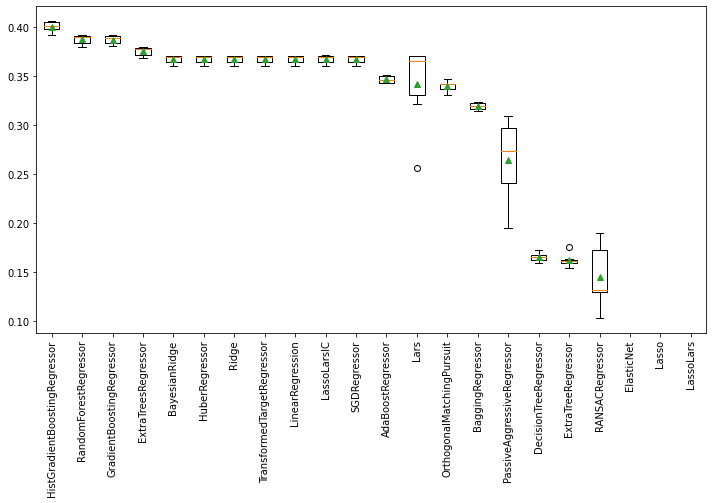

CPU times: user 3.79 s, sys: 569 ms, total: 4.36 s
Wall time: 4min 58s


In [26]:
%%time
results, names = list(), list()
mean_scores = []
std_scores = []
for name, model in regressors:
    if 'random_state' in model.get_params().keys():
        model.set_params(random_state=60)
    start = time.time()
    scores = cross_val_score(model, train[feat], target['target_g'], scoring=my_scorer, n_jobs=-1, cv= cv)
    results.append(scores)
    names.append(name)
    mean_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))
    end = time.time()
    print('>%s %.3f (%.3f), (%.3f)' % (name, np.mean(scores), np.std(scores), end-start))

df1 = pd.DataFrame(np.column_stack([names, mean_scores, std_scores]), 
                   columns=['models', 'mean_score', 'std_score'])
df2 = pd.DataFrame(results, columns=["".join('score'+ str(i)) for i in range(6) ])
final_df = pd.concat([df1, df2], axis=1)
int_cols = [f for f in final_df.columns if "score" in f]
for i in int_cols:
    final_df[i] = final_df[i].astype('float')

final_df.sort_values('mean_score', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
plt.boxplot(final_df.iloc[:, 3:].values.tolist(), labels=final_df['models'].to_list(), showmeans=True, )
plt.xticks(rotation = 90)
plt.show()

# TARGET G

>AdaBoostRegressor 0.485 (0.005), (7.276)
>BaggingRegressor 0.467 (0.002), (12.073)
>BayesianRidge 0.503 (0.003), (0.544)
>DecisionTreeRegressor 0.281 (0.004), (2.021)
>ElasticNet nan (nan), (0.283)
>ExtraTreeRegressor 0.278 (0.007), (1.324)
>ExtraTreesRegressor 0.520 (0.002), (110.316)
>GradientBoostingRegressor 0.524 (0.002), (32.043)
>HistGradientBoostingRegressor 0.538 (0.002), (4.877)
>HuberRegressor 0.503 (0.003), (4.346)
>Lars 0.499 (0.008), (0.307)
>Lasso nan (nan), (0.275)
>LassoLars nan (nan), (0.289)
>LassoLarsIC 0.503 (0.003), (0.366)
>LinearRegression 0.503 (0.003), (0.402)
>OrthogonalMatchingPursuit 0.468 (0.002), (0.282)
>PassiveAggressiveRegressor 0.434 (0.029), (0.539)
>RANSACRegressor 0.267 (0.052), (1.485)
>RandomForestRegressor 0.525 (0.002), (114.821)
>Ridge 0.503 (0.003), (0.352)
>SGDRegressor 0.503 (0.003), (0.972)
>TransformedTargetRegressor 0.503 (0.003), (0.407)


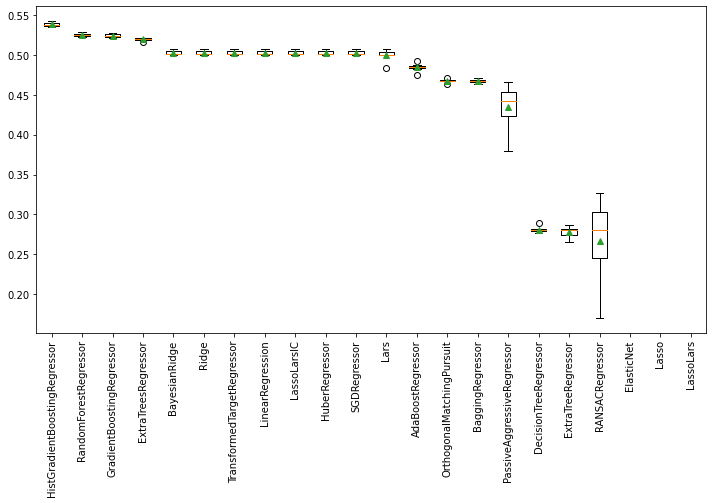

CPU times: user 3.85 s, sys: 714 ms, total: 4.56 s
Wall time: 4min 56s


In [31]:
%%time
import time
results, names = list(), list()
mean_scores = []
std_scores = []
for name, model in regressors:
    if 'random_state' in model.get_params().keys():
        model.set_params(random_state=60)
    start = time.time()
    scores = cross_val_score(model, train[feat], target['target_g'], scoring=my_scorer, n_jobs=-1, cv= cv)
    results.append(scores)
    names.append(name)
    mean_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))
    end = time.time()
    print('>%s %.3f (%.3f), (%.3f)' % (name, np.mean(scores), np.std(scores), end-start))

df1 = pd.DataFrame(np.column_stack([names, mean_scores, std_scores]), 
                   columns=['models', 'mean_score', 'std_score'])
df2 = pd.DataFrame(results, columns=["".join('score'+ str(i)) for i in range(6) ])
final_df = pd.concat([df1, df2], axis=1)
int_cols = [f for f in final_df.columns if "score" in f]
for i in int_cols:
    final_df[i] = final_df[i].astype('float')

final_df.sort_values('mean_score', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
plt.boxplot(final_df.iloc[:, 3:].values.tolist(), labels=final_df['models'].to_list(), showmeans=True, )
plt.xticks(rotation = 90)
plt.show()

In [32]:
final_df

,models,mean_score,std_score,score0,score1,score2,score3,score4,score5
8,HistGradientBoostingRegressor,0.538384,0.002417,0.536784,0.542405,0.535199,0.536674,0.539917,0.539327
18,RandomForestRegressor,0.525327,0.002183,0.524024,0.527006,0.522424,0.523320,0.528410,0.526777
7,GradientBoostingRegressor,0.524376,0.002260,0.523923,0.527698,0.520938,0.522457,0.526258,0.524982
6,ExtraTreesRegressor,0.519630,0.001763,0.520044,0.521921,0.516293,0.519132,0.520973,0.519415
2,BayesianRidge,0.503048,0.002739,0.501923,0.505964,0.501252,0.500025,0.507586,0.501538
19,Ridge,0.503044,0.002751,0.501917,0.505971,0.501253,0.499989,0.507599,0.501532
21,TransformedTargetRegressor,0.503043,0.002752,0.501917,0.505973,0.501253,0.499986,0.507599,0.501531
14,LinearRegression,0.503043,0.002752,0.501917,0.505973,0.501253,0.499986,0.507599,0.501531
13,LassoLarsIC,0.503043,0.002728,0.501917,0.505908,0.501247,0.500057,0.507599,0.501531
9,HuberRegressor,0.502970,0.002711,0.501849,0.505665,0.501374,0.499884,0.507580,0.501468


# TARGET B

In [ ]:
%%time
results, names = list(), list()
mean_scores = []
std_scores = []
for name, model in regressors:
    if 'random_state' in model.get_params().keys():
        model.set_params(random_state=60)
    scores = cross_val_score(model, train[feat], target['target_b'], scoring=my_scorer, n_jobs=-1, cv= cv)
    results.append(scores)
    names.append(name)
    mean_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

df1 = pd.DataFrame(np.column_stack([names, mean_scores, std_scores]), 
                   columns=['models', 'mean_score', 'std_score'])
df2 = pd.DataFrame(results, columns=["".join('score'+ str(i)) for i in range(6) ])
final_df = pd.concat([df1, df2], axis=1)
int_cols = [f for f in final_df.columns if "score" in f]
for i in int_cols:
    final_df[i] = final_df[i].astype('float')

final_df.sort_values('mean_score', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
plt.boxplot(final_df.iloc[:, 3:].values.tolist(), labels=final_df['models'].to_list(), showmeans=True, )
plt.xticks(rotation = 90)
plt.show()

>histgradient 0.401 (0.005)
>rf 0.387 (0.005)
>ttr 0.368 (0.004)
>stacking 0.395 (0.005)


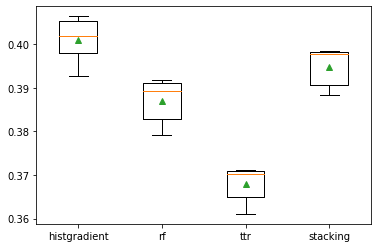

In [35]:
# get a stacking ensemble of models

from sklearn.ensemble import StackingRegressor
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('histgradient', sklearn.ensemble.HistGradientBoostingRegressor()))
	level0.append(('rf', sklearn.ensemble.RandomForestRegressor()))
	level0.append(('ttr', sklearn.compose.TransformedTargetRegressor()))
	# define meta learner model
	level1 = sklearn.linear_model.LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=3, n_jobs=-1)
	return model
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['histgradient'] = sklearn.ensemble.HistGradientBoostingRegressor()
	models['rf'] = sklearn.ensemble.RandomForestRegressor()
	models['ttr'] = sklearn.compose.TransformedTargetRegressor()
	models['stacking'] = get_stacking()
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=3, n_repeats=2, random_state=60)
	scores = cross_val_score(model, X, y, scoring=my_scorer, cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = train[feat], target['target_r']
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [40]:
%%time
seed = 60

# define the base models
level0 = list()
level0.append(('histgradient', sklearn.ensemble.HistGradientBoostingRegressor(random_state=seed)))
level0.append(('rf', sklearn.ensemble.RandomForestRegressor(random_state=seed)))
level0.append(('ttr', sklearn.compose.TransformedTargetRegressor()))
# define meta learner model
level1 = sklearn.linear_model.LinearRegression(n_jobs=-1)
# define the stacking ensemble
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5, n_jobs=-1)


prediction= pd.DataFrame()
model.fit(train[feat], target['target_r'])
prediction['target_r'] = model.predict(test[feat])
print("Done target RRRRR")
model.fit(train[feat], target['target_g'])
prediction['target_g'] = model.predict(test[feat])
print("Done target GGGGGG")

model.fit(train[feat], target['target_b'])
prediction['target_b'] = model.predict(test[feat])
print("Done target BBBBB")


Done target RRRRR
Done target GGGGGG
Done target BBBBB
CPU times: user 23.6 s, sys: 6.12 s, total: 29.7 s
Wall time: 11min 10s


In [41]:
prediction[prediction['target_r'] > 1],prediction[prediction['target_g'] > 1], prediction[prediction['target_b'] > 1]

(Empty DataFrame
 Columns: [target_r, target_g, target_b]
 Index: [], Empty DataFrame
 Columns: [target_r, target_g, target_b]
 Index: [], Empty DataFrame
 Columns: [target_r, target_g, target_b]
 Index: [])

In [42]:
prediction[prediction['target_r'] < 0],prediction[prediction['target_g'] < 0], prediction[prediction['target_b'] < 0],

(Empty DataFrame
 Columns: [target_r, target_g, target_b]
 Index: [], Empty DataFrame
 Columns: [target_r, target_g, target_b]
 Index: [], Empty DataFrame
 Columns: [target_r, target_g, target_b]
 Index: [])

In [43]:
prediction

,target_r,target_g,target_b
0,0.477603,0.443273,0.414115
1,0.584325,0.581000,0.609419
2,0.397445,0.319316,0.239058
3,0.566447,0.586047,0.606841
4,0.430467,0.426972,0.392520
...,...,...,...
48532,0.599235,0.653622,0.710890
48533,0.740221,0.835180,0.909756
48534,0.630251,0.750545,0.836620
48535,0.722905,0.826749,0.889345


In [44]:
API_KEY = "0GIskIC9Rd1I8sMw6nStutbIbMx7AaZzAyNfuMOVAVWgJtNa1IVQHZAD3WPj" # <- HERE

r = requests.post("https://tournament.datacrunch.com/api/submission",
    files = {
        "file": ("x", prediction.to_csv().encode('ascii'))
    },
    data = {
        "apiKey": API_KEY
    },
)

if r.status_code == 200:
    print("Submission submitted :)")
elif r.status_code == 423:
    print("ERR: Submissions are close")
    print("You can only submit during rounds eg: Friday 7pm GMT+1 to Sunday midnight GMT+1.")
    print("Or the server is currently crunching the submitted files, please wait some time before retrying.")
elif r.status_code == 422:
    print("ERR: API Key is missing or empty")
    print("Did you forget to fill the API_KEY variable?")
elif r.status_code == 404:
    print("ERR: Unknown API Key")
    print("You should check that the provided API key is valid and is the same as the one you've received by email.")
elif r.status_code == 400:
    print("ERR: The file must not be empty")
    print("You have send a empty file.")
elif r.status_code == 401:
    print("ERR: Your email hasn't been verified")
    print("Please verify your email or contact a cruncher.")
elif r.status_code == 429:
    print("ERR: Too many submissions")
else:
    print("ERR: Server returned: " + str(r.status_code))
    print("Ouch! It seems that we were not expecting this kind of result from the server, if the probleme persist, contact a cruncher.")

Submission submitted :)
